
# Regresión


##Datos de Boston
Este conjunto de datos mide la influencia de factores socioeconómicos en el precio de varias propiedades de la ciudad de Boston. El conjunto cuenta con 506 registros, cada uno caracterizado por 13 variables:

* CRIM: Tasa de crimen per cápita por ciudad
* ZN: Proporción de zona residencial para lotes arriba de 25.000 pies cuadrados
* INDUS: Proporción de hectáreas destinadas a oficinas por ciudad
* CHAS: Variable dummy del rio Charles. (1 si limita con el río, 0 si no)
* NOX: Concentración de partículas de óxido de nitrito (partículas por 10 millones)
* RM: Número promedio de habitaciones por habitante
* AGE: Proporción de unidades ocupadas que hayan sido construídas antes de 1940
* DIS: Distancias ponderadas hacía cinco centros de trabajo de Boston
* RAD: Índice de accesibilidad a autopistas radiales
* TAX: Tasa de impuesto a la propiedad por 10,000 USD
* PTRATIO: Tasa de alumnos-profesor por ciudad
* B: $1000(Bk - 0.63)^2$, donde $Bk$ corresponde a la proporción de personas de la comunidad negra en la ciudad
* LSTAT: Porcentaje de personas de clase baja

Variable de salida:
* MEDV: Precio de la casa en miles de dólares

**Tenga en cuenta:** En este ejercicio siempre vamos a intentar predecir la variable `MEDV` sin importar qué variables explicativas usemos. Es decir, en algunos casos usaremos un subconjunto de los 13 atributos mencionados y en otras, manejaremos los 13 atributos. Pero en ningún caso cambiaremos la variable dependiente $y$.

## Carga de datos:

1. Cargue el conjunto de datos usando `from sklearn.datasets import load_boston`
2. Cree un DataFrame de Pandas usando a partir del atributo `.data` de la función de carga de Scikit-Learn.
3. Asígne las columnas del DataFrame de tal forma que sean igual al atributo `.feature_names` de la función de carga de Scikit-Learn.
4. Agregue una nueva columna al DataFrame que contenga el valor a predecir, es decir, el atributo `.target` de la función de carga de Scikit-Learn. El nombre de esta columna debe ser `MEDV`.
5. Use la función `.describe()` de Pandas para obtener estadísticas acerca de cada columna.



In [2]:
from sklearn.datasets import load_boston
import pandas as pd
y = load_boston().target
df = pd.DataFrame(data=load_boston().data, columns=load_boston().feature_names)
df["MEDV"] = pd.DataFrame(data=y)
df.describe()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Análisis de características:

Usando el DataFrame generado en la sección anterior:
* Filtre el conjunto de datos a solo estas características:
    * Explicativas: 'LSTAT', 'INDUS', 'NOX', 'RM', 'AGE'
    * Dependiente: 'MEDV'.
* Genere una matriz scatter entre las características mencionadas arriba usando Pandas (`scatter_matrix`) o Seaborn (`pairplot`).
    * ¿Encuentra alguna relación entre las características?
* Genera la matriz de correlación entre estas variables usando `numpy.corrcoef`. Incluya también `MEDV`.
    * ¿Qué características están más correlacionadas?
    * BONUS: Visualice esta matriz como mapa de calor usando Pandas, Matplotlib o Seaborn.



In [0]:
X=df[['LSTAT', 'INDUS', 'NOX', 'RM', 'AGE']]
y=df["MEDV"]


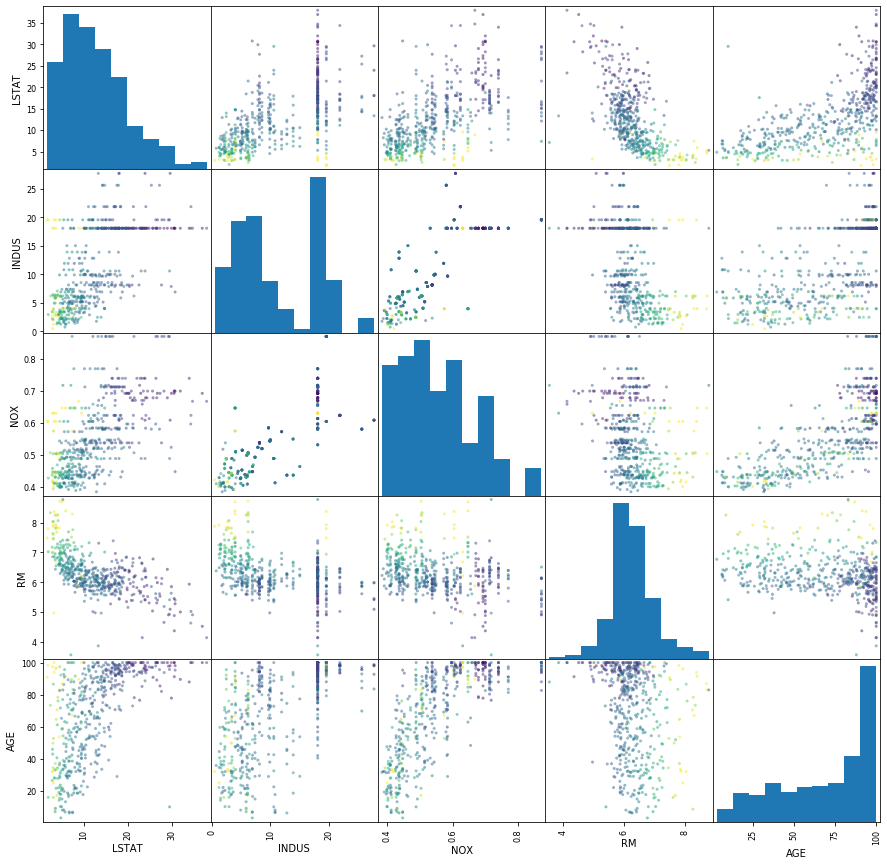

In [4]:
pd.plotting.scatter_matrix(X, c=y, figsize=(15, 15));

In [5]:
#Matriz de correlaciones
import numpy as np
var = df[['LSTAT', 'INDUS', 'NOX', 'RM', 'AGE',"MEDV"]]
np.corrcoef(var)

array([[1.        , 0.99075004, 0.97819441, ..., 0.98581972, 0.98307924,
        0.95808787],
       [0.99075004, 1.        , 0.94982287, ..., 0.99668853, 0.99682335,
        0.98682013],
       [0.97819441, 0.94982287, 1.        , ..., 0.94907484, 0.942261  ,
        0.89591008],
       ...,
       [0.98581972, 0.99668853, 0.94907484, ..., 1.        , 0.99973225,
        0.98987793],
       [0.98307924, 0.99682335, 0.942261  , ..., 0.99973225, 1.        ,
        0.99280619],
       [0.95808787, 0.98682013, 0.89591008, ..., 0.98987793, 0.99280619,
        1.        ]])

## Modelando relaciones lineales y no lineales

* Genere dos nuevos subconjuntos filtrando estas características:
    * $D_1$:  $X = \textit{'RM'}$, $y = \textit{'MEDV'}$
    * $D_2$:  $X = \textit{'LSTAT'}$, $y = \textit{'MEDV'}$
* Para cada subconjunto, genere una partición de entrenamiento y otra de prueba usando una proporción $70\%-30\%$
* Entrene un modelo de regresión lineal sobre ambos subconjuntos de datos:
    * Reporte el error cuadrático medio sobre el conjunto de prueba
    * Imprima los valores de $w$ y $w_0$ de la ecuación de regresión
    * Genere una gráfica donde visualice la línea obtenida por el modelo de regresión en conjunto con los datos de entrenamiento y los datos de prueba
* Entrene un modelo de regresión usando árboles de decisión de profundidad máxima de 4 sobre ambos subconjuntos de datos:
    * Reporte el error cuadrático medio sobre el conjunto de prueba
    * Genere una gráfica donde visualice la línea obtenida por el modelo de regresión en conjunto con los datos de entrenamiento y los datos de prueba
* ¿Qué modelo tiene mejor desempeño sobre $D_1$? ¿Qué modelo tiene mejor desempeño sobre $D_2$? ¿Por qué?



Pendiente: 9.118102197303786
Intersección en y: -34.662307438406785
Error cuadrático medio: 40.35144969787305


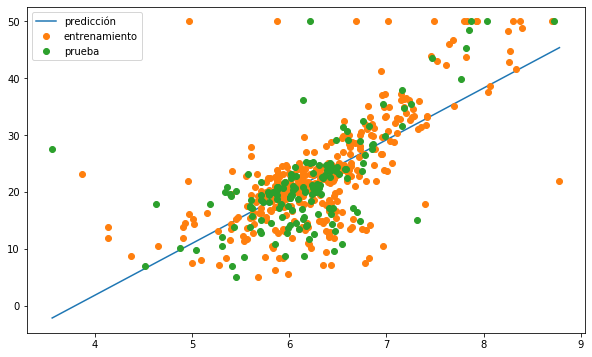

In [6]:
#Subconjunto D1
d1=df[["RM","MEDV"]]


from sklearn.model_selection import train_test_split
#Se hace el Reshape de la variable X
d1_X=np.array(d1["RM"])
d1_X= d1_X[:, np.newaxis]
d1_X.shape

#Partición 30-70
X_train_d1, X_test_d1, y_train_d1, y_test_d1 = train_test_split(d1_X, d1["MEDV"], test_size=0.3, random_state=42)

from sklearn.linear_model import LinearRegression

#Se entrena el modelo
regressor_d1 = LinearRegression()
regressor_d1.fit(X_train_d1, y_train_d1)

print('Pendiente: {}'.format(regressor_d1.coef_[0]))
print('Intersección en y: {}'.format(regressor_d1.intercept_))

from sklearn.metrics import mean_squared_error

pred = regressor_d1.predict(X_test_d1)
print('Error cuadrático medio: {}'.format(mean_squared_error(pred, y_test_d1)))

#Gráfica
from matplotlib import pyplot as plt
import pylab as pl
min_pt = d1_X.min() * regressor_d1.coef_[0] + regressor_d1.intercept_
max_pt = d1_X.max() * regressor_d1.coef_[0] + regressor_d1.intercept_

pl.figure(figsize = (10, 6))
pl.plot([d1_X.min(), d1_X.max()], [min_pt, max_pt], label="predicción")
pl.plot(X_train_d1, y_train_d1, 'o', label="entrenamiento");
pl.plot(X_test_d1, y_test_d1, 'o', label="prueba");
pl.legend(loc='best');

Pendiente: -0.9862032105333924
Intersección en y: 35.26557743777449
Error cuadrático medio: 38.0987021824347


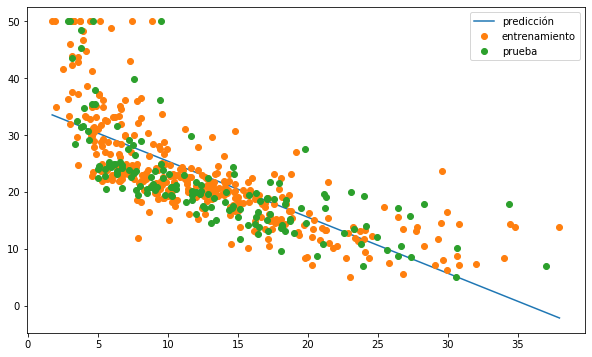

In [7]:
#Subconjunto D2
d2=df[["LSTAT","MEDV"]]

from sklearn.model_selection import train_test_split
#Se hace el Reshape de la variable X
d2_X=np.array(d2["LSTAT"])
d2_X= d2_X[:, np.newaxis]
d2_X.shape

#Partición 30-70
X_train_d2, X_test_d2, y_train_d2, y_test_d2 = train_test_split(d2_X, d2["MEDV"], test_size=0.3, random_state=42)

from sklearn.linear_model import LinearRegression

#Se entrena el modelo
regressor_d2 = LinearRegression()
regressor_d2.fit(X_train_d2, y_train_d2)
print('Pendiente: {}'.format(regressor_d2.coef_[0]))
print('Intersección en y: {}'.format(regressor_d2.intercept_))

from sklearn.metrics import mean_squared_error

pred = regressor_d2.predict(X_test_d2)
print('Error cuadrático medio: {}'.format(mean_squared_error(pred, y_test_d2)))

#Gráfica
from matplotlib import pyplot as plt
import pylab as pl
min_pt = d2_X.min() * regressor_d2.coef_[0] + regressor_d2.intercept_
max_pt = d2_X.max() * regressor_d2.coef_[0] + regressor_d2.intercept_

pl.figure(figsize = (10, 6))
pl.plot([d2_X.min(), d2_X.max()], [min_pt, max_pt], label="predicción")
pl.plot(X_train_d2, y_train_d2, 'o', label="entrenamiento");
pl.plot(X_test_d2, y_test_d2, 'o', label="prueba");
pl.legend(loc='best');

## Entrenamiento de un modelo de regresión

* Genere un particionamiento 70-30 de los datos **usando todas las características**. (No incluya la variable dependiente `MEDV`)
* Entrene un modelo de regresión lineal con el objetivo de predecir la variable de salida `MEDV`.
    * Reporte el error cuadrático medio sobre el conjunto de prueba
* Entrene un modelo de regresión usando `MLPRegressor` con el objetivo de predecir la variable de salida `MEDV`. 
    * Reporte el error cuadrático medio sobre el conjunto de prueba
* Escale los datos para que tengan media cero varianza uno por característica (solo $X$). Puede usar la siguiente pieza de código:

```python
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
sc_x.fit(X)
X_train_s = sc_x.transform(X_train)
X_test_s = sc_x.transform(X_test)
```
Puede consultar más acerca de `StandardScaler` [aquí](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).
* Entrene los siguientes modelos:
    1. Entrene un modelo de regresión lineal usando los datos escalados.
        * Reporte el error cuadrático medio sobre el conjunto de prueba
    2. Entrene un modelo de regresión usando un MultiLayerPerceptron de 2 capas (128 neuronas en la primera y 512 en la segunda) y con los **datos escalados**.
        * Reporte el error cuadrático medio sobre el conjunto de prueba
    3. ¿Cuál modelo tiene mejor desempeño? ¿Por qué?

In [8]:
y=np.array(df["MEDV"])
y.shape

(506,)

In [9]:
#Modelo Lineal con todas las variables
y=np.array(df["MEDV"])
var=np.array(df.drop(columns=["MEDV"]))
var.shape
#Partición 30-70
X_train, X_test, y_train, y_test = train_test_split(var, y, test_size=0.3, random_state=42)

#Se entrena el modelo
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print('Pendiente: {}'.format(regressor.coef_[0]))
print('Intersección en y: {}'.format(regressor.intercept_))

from sklearn.metrics import mean_squared_error

pred = regressor.predict(X_test)
print('Error cuadrático medio: {}'.format(mean_squared_error(pred, y_test)))

Pendiente: -0.13347010285294458
Intersección en y: 31.631084035694734
Error cuadrático medio: 21.517444231176903


In [10]:
#MLP
from sklearn.neural_network import MLPRegressor

mlp_regressor_simple = MLPRegressor(solver='lbfgs', alpha=1e-5, activation='relu',
                                       hidden_layer_sizes=(10), random_state=1)

mlp_regressor_simple.fit(X_train, y_train)

pred = mlp_regressor_simple.predict(X_test)
print('Error cuadrático medio: {}'.format(mean_squared_error(pred, y_test)))

Error cuadrático medio: 26.794459921339215


In [0]:
#Se escalan los Datos (Media=0, Varianza=1)

from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
sc_x.fit(var)
X_train_s = sc_x.transform(X_train)
X_test_s = sc_x.transform(X_test)

In [12]:

#Modelo Lineal con todas las variables escaladas

#Se entrena el modelo
regressor = LinearRegression()
regressor.fit(X_train_s, y_train)
print('Pendiente: {}'.format(regressor.coef_[0]))
print('Intersección en y: {}'.format(regressor.intercept_))

from sklearn.metrics import mean_squared_error

pred = regressor.predict(X_test_s)
print('Error cuadrático medio: {}'.format(mean_squared_error(pred, y_test)))

Pendiente: -1.1469141129770637
Intersección en y: 22.50945471291038
Error cuadrático medio: 21.51744423117727


In [13]:
MLPRegressor()

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.001, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [14]:
#MLP 2 capas datos escalados

mlp_regressor_complex = MLPRegressor(solver='lbfgs', alpha=1e-5, activation='relu',
                                       hidden_layer_sizes=(128,512), random_state=1)

mlp_regressor_complex.fit(X_train_s, y_train)

pred = mlp_regressor_complex.predict(X_test_s)
print('Error cuadrático medio: {}'.format(mean_squared_error(pred, y_test)))

Error cuadrático medio: 15.000967383996004
